In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf

from IPython.display import display, HTML

display(HTML(
    '<style>'
        '#notebook { padding-top: 0px !important; } ' 
        '.container { width: 100% !important; } '
        '.end_space { min-height: 0px !important; } '
        'table, tr, td { border: 1px  black solid !important; color: black; }'
        'th { border: 1px  black solid !important; color: #130f40; background: #ECFED7; }'
    '</style>'
))

In [120]:
food_consumption = pd.read_csv(r'C:\000_TBL\001 DATA ANALYSIS\DATACAMP\PYTHON\ProjectFiles\05_Introduction_Statistics_Python\Datasets\food_consumption.csv')
amir_deals = pd.read_csv(r'C:\000_TBL\001 DATA ANALYSIS\DATACAMP\PYTHON\ProjectFiles\05_Introduction_Statistics_Python\Datasets\amir_deals.csv')

In [121]:
food_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


In [122]:
# Calculate the quartiles of co2_emission
display(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [123]:
# Calculate the quintiles of co2_emission
display(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [124]:
# Calculate the deciles of co2_emission
display(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


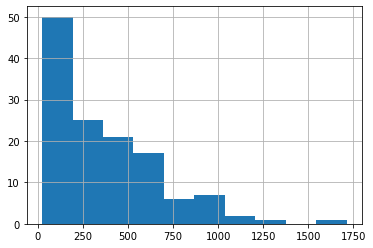

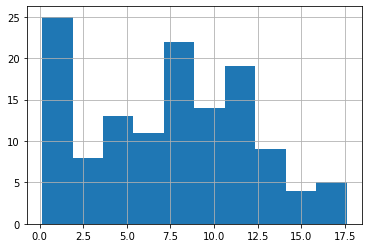

In [125]:
# Print variance and sd of co2_emission for each food_category
display(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

In [126]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

display(emissions_by_country)

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1


# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
display(outliers)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

country
Argentina    2172.4
Name: co2_emission, dtype: float64

In [127]:
display(amir_deals)

# Count the deals for each product
counts = amir_deals['product'].value_counts()
display(counts)
print(amir_deals.shape[0])
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

178
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [128]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
display(sample_with_replacement)

,Unnamed: 0,product,client,status,amount,num_users
162,163,Product D,Current,Won,6755.66,59
131,132,Product B,Current,Won,6872.29,25
87,88,Product C,Current,Won,3579.63,3
145,146,Product A,Current,Won,4682.94,63
145,146,Product A,Current,Won,4682.94,63
